
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Training Alice and Bob, Epoch: 1
0.9999915 b
1.0 e
Training Eve, Epoch: 1
1.0 b
0.9992796 e
Training Alice and Bob, Epoch: 2
0.99999154 b
1.0 e
Training Eve, Epoch: 2
1.0 b
0.9990017 e
Training Alice and Bob, Epoch: 3
0.99998695 b
1.0 e
Training Eve, Epoch: 3
1.0 b
0.9989812 e
Training Alice and Bob, Epoch: 4
0.99995273 b
1.0 e
Training Eve, Epoch: 4
1.0 b
0.9978933 e
Training Alice and Bob, Epoch: 5
0.999763 b
1.0 e
Training Eve, Epoch: 5
1.0 b
0.99514395 e
Training Alice and Bob, Epoch: 6
0.99808383 b
1.0 e
Training Eve, Epoch: 6
1.0 b
0.992982 e
Training Alice and Bob, Epoch: 7
0.9915704 b
1.0 e
Training Eve, Epoch: 7
1.0 b
0.9867334

0.0053186994 b
1.0 e
Training Eve, Epoch: 77
1.0 b
0.837689 e
Training Alice and Bob, Epoch: 78
0.005403425 b
1.0 e
Training Eve, Epoch: 78
1.0 b
0.8304815 e
Training Alice and Bob, Epoch: 79
0.0052290307 b
1.0 e
Training Eve, Epoch: 79
1.0 b
0.83067375 e
Training Alice and Bob, Epoch: 80
0.005010566 b
1.0 e
Training Eve, Epoch: 80
1.0 b
0.8296913 e
Training Alice and Bob, Epoch: 81
0.004905197 b
1.0 e
Training Eve, Epoch: 81
1.0 b
0.83327925 e
Training Alice and Bob, Epoch: 82
0.004789644 b
1.0 e
Training Eve, Epoch: 82
1.0 b
0.84126014 e
Training Alice and Bob, Epoch: 83
0.005001504 b
1.0 e
Training Eve, Epoch: 83
1.0 b
0.833368 e
Training Alice and Bob, Epoch: 84
0.004619066 b
1.0 e
Training Eve, Epoch: 84
1.0 b
0.8358346 e
Training Alice and Bob, Epoch: 85
0.0046263463 b
1.0 e
Training Eve, Epoch: 85
1.0 b
0.84161127 e
Training Alice and Bob, Epoch: 86
0.0043706717 b
1.0 e
Training Eve, Epoch: 86
1.0 b
0.83828866 e
Training Alice and Bob, Epoch: 87
0.0044773156 b
1.0 e
Training Eve

0.0009949945 b
1.0 e
Training Eve, Epoch: 161
1.0 b
0.8736107 e
Training Alice and Bob, Epoch: 162
0.0010090577 b
1.0 e
Training Eve, Epoch: 162
1.0 b
0.8737245 e
Training Alice and Bob, Epoch: 163
0.0009587785 b
1.0 e
Training Eve, Epoch: 163
1.0 b
0.87895656 e
Training Alice and Bob, Epoch: 164
0.0010150154 b
1.0 e
Training Eve, Epoch: 164
1.0 b
0.881518 e
Training Alice and Bob, Epoch: 165
0.0009183601 b
1.0 e
Training Eve, Epoch: 165
1.0 b
0.88303924 e
Training Alice and Bob, Epoch: 166
0.00089790596 b
1.0 e
Training Eve, Epoch: 166
1.0 b
0.8677708 e
Training Alice and Bob, Epoch: 167
0.0009465326 b
1.0 e
Training Eve, Epoch: 167
1.0 b
0.8706243 e
Training Alice and Bob, Epoch: 168
0.0009387793 b
1.0 e
Training Eve, Epoch: 168
1.0 b
0.87455547 e
Training Alice and Bob, Epoch: 169
0.00090262 b
1.0 e
Training Eve, Epoch: 169
1.0 b
0.87734485 e
Training Alice and Bob, Epoch: 170
0.0008412951 b
1.0 e
Training Eve, Epoch: 170
1.0 b
0.8682558 e
Training Alice and Bob, Epoch: 171
0.000874

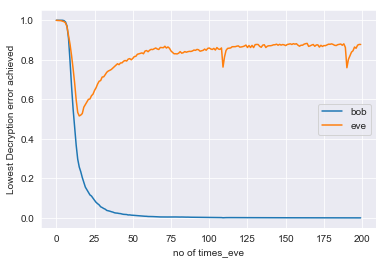

In [1]:
import tensorflow as tf

from argparse import ArgumentParser
from model import CryptoNet
from config import *


%matplotlib inline


# import tensorflow as tf
# import numpy as np

# import matplotlib
# # %matplotlib qt
# # OSX fix
# # matplotlib.use('TkAgg')

# import matplotlib.pyplot as plt
# import seaborn as sns

# from layers import conv_layer
# from config import *
# from utils import init_weights, gen_data


# class CryptoNet(object):
#     def __init__(self, sess, msg_len=MSG_LEN, batch_size=BATCH_SIZE,
#                  epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE):
#         """
#         Args:j
#             sess: TensorFlow session
#             msg_len: The length of the input message to encrypt.
#             key_len: Length of Alice and Bob's private key.
#             batch_size: Minibatch size for each adversarial training
#             epochs: Number of epochs in the adversarial training
#             learning_rate: Learning Rate for Adam Optimizer
#         """

#         self.sess = sess
#         self.msg_len = msg_len
#         self.key_len = self.msg_len
#         self.N = self.msg_len
#         self.batch_size = batch_size
#         self.epochs = epochs
#         self.learning_rate = learning_rate

#         self.build_model()

#     def build_model(self):
#         # Weights for fully connected layers
#         self.w_alice = init_weights("alice_w", [2 * self.N, 2 * self.N])
#         self.w_bob = init_weights("bob_w", [2 * self.N, 2 * self.N])
#         self.w_eve1 = init_weights("eve_w1", [self.N, 2 * self.N])
#         self.w_eve2 = init_weights("eve_w2", [2 * self.N, 2 * self.N])

#         # Placeholder variables for Message and Key
#         self.msg = tf.placeholder("float", [None, self.msg_len])
#         self.key = tf.placeholder("float", [None, self.key_len])

#         # Alice's network
#         # FC layer -> Conv Layer (4 1-D convolutions)
#         self.alice_input = tf.concat([self.msg, self.key],1)
#         self.alice_hidden = tf.nn.sigmoid(tf.matmul(self.alice_input, self.w_alice))
#         self.alice_hidden = tf.expand_dims(self.alice_hidden, 2)
#         self.alice_output = tf.squeeze(conv_layer(self.alice_hidden, "alice"))

#         # Bob's network
#         # FC layer -> Conv Layer (4 1-D convolutions)
#         self.bob_input = tf.concat([self.alice_output, self.key],1)
#         self.bob_hidden = tf.nn.sigmoid(tf.matmul(self.bob_input, self.w_bob))
#         self.bob_hidden = tf.expand_dims(self.bob_hidden, 2)
#         self.bob_output = tf.squeeze(conv_layer(self.bob_hidden, "bob"))

#         # Eve's network
#         # FC layer -> FC layer -> Conv Layer (4 1-D convolutions)
#         self.eve_input = self.alice_output
#         self.eve_hidden1 = tf.nn.sigmoid(tf.matmul(self.eve_input, self.w_eve1))
#         self.eve_hidden2 = tf.nn.sigmoid(tf.matmul(self.eve_hidden1, self.w_eve2))
#         self.eve_hidden2 = tf.expand_dims(self.eve_hidden2, 2)
#         self.eve_output = tf.squeeze(conv_layer(self.eve_hidden2, "eve"))

#     def train(self):
#         # Loss Functions
#         self.decrypt_err_eve = tf.reduce_mean(tf.abs(self.msg - self.eve_output))
#         self.decrypt_err_bob = tf.reduce_mean(tf.abs(self.msg - self.bob_output))
#         self.loss_bob = self.decrypt_err_bob + (1. - self.decrypt_err_eve) ** 2.

#         # Get training variables corresponding to each network
#         self.t_vars = tf.trainable_variables()
#         self.alice_or_bob_vars = [var for var in self.t_vars if 'alice_' in var.name or 'bob_' in var.name]
#         self.eve_vars = [var for var in self.t_vars if 'eve_' in var.name]

#         # Build the optimizers
#         self.bob_optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(
#             self.loss_bob, var_list=self.alice_or_bob_vars)
#         self.eve_optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(
#             self.decrypt_err_eve, var_list=self.eve_vars)

#         self.bob_errors, self.eve_errors = [], []

#         # Begin Training
#         tf.global_variables_initializer().run()
#         for i in range(self.epochs):
#             iterations = 25

#             print('Training Alice and Bob, Epoch:', i + 1)
#             bob_loss, _ = self._train('bob', iterations)
#             self.bob_errors.append(bob_loss)

#             print('Training Eve, Epoch:', i + 1)
#             _, eve_loss = self._train('eve', iterations)
#             self.eve_errors.append(eve_loss)

#         self.plot_errors()

#     def _train(self, network, iterations):
#         bob_decrypt_error, eve_decrypt_error = 1., 1.

#         bs = self.batch_size
#         # Train Eve for two minibatches to give it a slight computational edge
#         if network == 'eve':
#             bs *= 2

#         for i in range(iterations):
#             msg_in_val, key_val = gen_data(n=bs, msg_len=self.msg_len, key_len=self.key_len)

#             if network == 'bob':
#                 _, decrypt_err = self.sess.run([self.bob_optimizer, self.decrypt_err_bob],
#                                                feed_dict={self.msg: msg_in_val, self.key: key_val})
# #                 bob_decrypt_error =  decrypt_err
# #                 print(bob_decrypt_error,'b')
#                 bob_decrypt_error = min(bob_decrypt_error, decrypt_err)
                

#             elif network == 'eve':
        
#                 _, decrypt_err = self.sess.run([self.eve_optimizer, self.decrypt_err_eve],
#                                                feed_dict={self.msg: msg_in_val, self.key: key_val})
            
# #                 eve_decrypt_error =  decrypt_err
# #                 print(eve_decrypt_error,'e')
 
#                 eve_decrypt_error = min(eve_decrypt_error, decrypt_err)
               
               
#         print(bob_decrypt_error,'b')
#         print(eve_decrypt_error,'e')
#         return bob_decrypt_error, eve_decrypt_error

#     def plot_errors(self):
#         """
#         Plot Lowest Decryption Errors achieved by Bob and Eve per epoch
#         """
#         sns.set_style("darkgrid")
# #         plt.subplot(1,2,1)
#         fig,axi = plt.subplots()
#         axi.plot(self.bob_errors)
#         plt.draw()
# #         plt.legend(['bob'])
# #         plt.xlabel('no of times')
# #         plt.ylabel('Lowest Decryption error achieved')
# #         plt.subplot(1,2,2)
#         axi.plot(self.eve_errors)
#         axi.legend(['bob','eve'])
#         plt.xlabel('no of times_eve')
#         plt.ylabel('Lowest Decryption error achieved')
# #         plt.legend(['bob', 'eve'])
# #         plt.xlabel('no of times')
# #         plt.ylabel('Lowest Decryption error achieved')
#         plt.show()











with tf.Session() as sess:
    crypto_net = CryptoNet(sess, msg_len=MSG_LEN, epochs=NUM_EPOCHS,
                               batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE)
    crypto_net.train()